In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 45.2MB/s]
100% 270M/271M [00:03<00:00, 91.5MB/s]
100% 271M/271M [00:03<00:00, 92.5MB/s]
 99% 540M/543M [00:05<00:00, 91.6MB/s]
100% 543M/543M [00:05<00:00, 95.2MB/s]


# **Dogs vs Cats classifier**

In [2]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [3]:
!unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [4]:
train_path= '/content/train'
test_path= '/content/test1'

In [5]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [6]:
dirls = os.listdir(train_path)
print(dirls)
val = train_path + '/'+dirls[0]
print(val)

['cat.7544.jpg', 'cat.3547.jpg', 'dog.4340.jpg', 'dog.7862.jpg', 'cat.6305.jpg', 'cat.10705.jpg', 'cat.2348.jpg', 'dog.270.jpg', 'cat.439.jpg', 'dog.2269.jpg', 'cat.7329.jpg', 'cat.7987.jpg', 'cat.5061.jpg', 'dog.4729.jpg', 'cat.6590.jpg', 'dog.10077.jpg', 'cat.1404.jpg', 'dog.10058.jpg', 'dog.9829.jpg', 'cat.5870.jpg', 'dog.11648.jpg', 'cat.3441.jpg', 'dog.5836.jpg', 'cat.11581.jpg', 'dog.1588.jpg', 'dog.12368.jpg', 'cat.4336.jpg', 'cat.7382.jpg', 'cat.5744.jpg', 'cat.11224.jpg', 'cat.626.jpg', 'cat.8111.jpg', 'dog.11045.jpg', 'dog.7472.jpg', 'dog.8080.jpg', 'dog.1340.jpg', 'dog.9313.jpg', 'cat.1748.jpg', 'dog.4634.jpg', 'cat.3022.jpg', 'dog.11278.jpg', 'cat.10779.jpg', 'dog.2676.jpg', 'cat.3597.jpg', 'dog.4389.jpg', 'dog.3698.jpg', 'cat.377.jpg', 'dog.10373.jpg', 'cat.11432.jpg', 'cat.11619.jpg', 'dog.12390.jpg', 'dog.5251.jpg', 'cat.6551.jpg', 'cat.1095.jpg', 'cat.6718.jpg', 'cat.2000.jpg', 'cat.11037.jpg', 'cat.9361.jpg', 'cat.10344.jpg', 'cat.7271.jpg', 'dog.7399.jpg', 'dog.222.jp

## **arranging into dataframe**

In [7]:
def list_full_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory)]

train = pd.DataFrame({'filepath': list_full_paths('/content/train')})
train['truth_label'] = np.where(train['filepath'].str.contains('dog'), 'dog', 'cat')

# test = pd.DataFrame({'filepath': list_full_paths('/content/test1')})

In [8]:
train.head()

filepath truth_label
0  /content/train/cat.7544.jpg         cat
1  /content/train/cat.3547.jpg         cat
2  /content/train/dog.4340.jpg         dog
3  /content/train/dog.7862.jpg         dog
4  /content/train/cat.6305.jpg         cat

In [9]:
train['truth_label'].value_counts()

cat    12500
dog    12500
Name: truth_label, dtype: int64

## **data is balanced**

<class 'numpy.ndarray'>
(365, 417, 3)


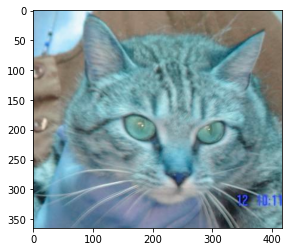

In [10]:
img = cv2.imread(train['filepath'][0])
print(type(img))
print(img.shape)
plt.imshow(img)

<class 'numpy.ndarray'>
(500, 331, 3)


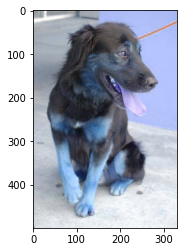

In [11]:
img = cv2.imread(train['filepath'][100])
print(type(img))
print(img.shape)
plt.imshow(img)

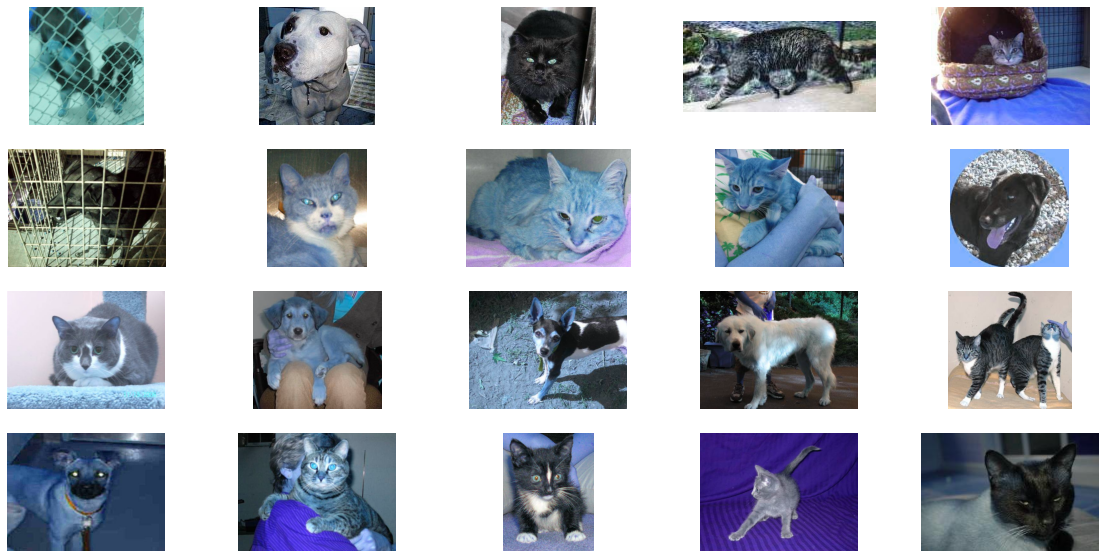

In [12]:
plt.figure(figsize=(20,10))
for i in range(20):
    vals = np.random.randint(0,len(train))
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.imread(train['filepath'][vals]))
    plt.axis('off')
plt.show()

## **photos are not of same size**

In [13]:
train.shape

(25000, 2)

In [14]:
train.columns

Index(['filepath', 'truth_label'], dtype='object')

In [26]:
train['truth_label'].value_counts()

cat    12500
dog    12500
Name: truth_label, dtype: int64

## **split in validation data**

In [16]:
X_train, X_valid = train_test_split(train, test_size=0.2)

In [17]:
X_train.shape

(20000, 2)

In [18]:
X_train.columns

Index(['filepath', 'truth_label'], dtype='object')

In [19]:
X_valid.shape

(5000, 2)

## **Preprocessing**

In [27]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')


In [28]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

## **Applying the preprocessing**

In [29]:
train_gen = train_datagen.flow_from_dataframe(dataframe = X_train, x_col='filepath', y_col='truth_label', batch_size=16, 
                                               target_size = (224, 224),class_mode = 'categorical', shuffle=True)

Found 20000 validated image filenames belonging to 2 classes.


In [30]:
valid_gen = train_datagen.flow_from_dataframe(dataframe = X_valid, x_col='filepath', y_col='truth_label', batch_size=16, 
                                               target_size = (224, 224),class_mode = 'categorical', shuffle=True)

Found 5000 validated image filenames belonging to 2 classes.


## **Show preprocessed iamges**

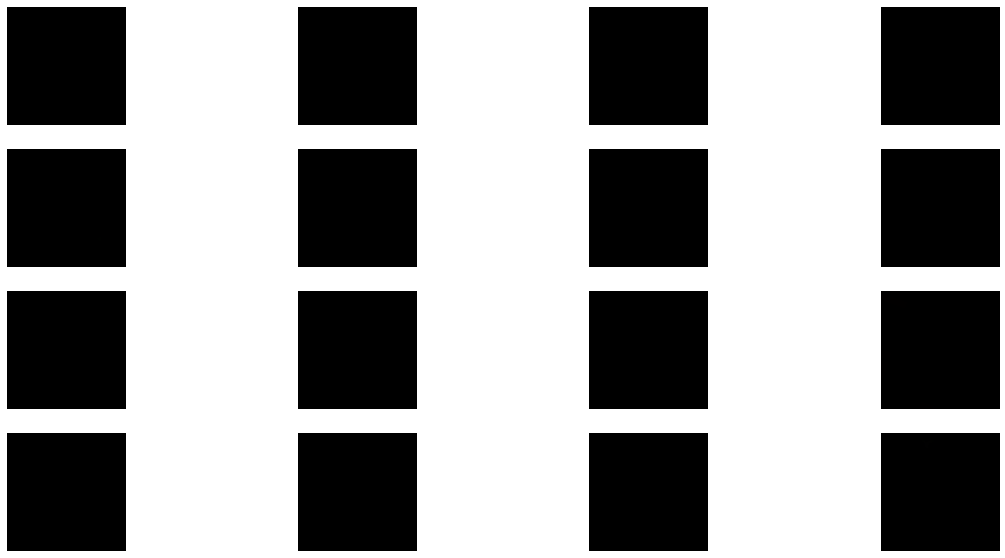

In [31]:
plt.figure(figsize=(20,10))
for i in range(16):
    vals = train_gen[0][0][i]
    vals = vals.astype('uint8')
    plt.subplot(4,4,i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

## **Now images are also of same shapes**

## **model from scratch**

In [25]:
hhkjgyugi

NameError: ignored

In [41]:
classifier = Sequential()

classifier.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",
                padding="valid", input_shape = (224,224,3)))
classifier.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
classifier.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",
                padding="valid"))
classifier.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
classifier.add(Flatten())
classifier.add(Dense(128,activation="relu")) 
classifier.add(Dense(2,activation="sigmoid")) 

In [42]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 93312)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [43]:
classifier.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
history = classifier.fit(train_gen, validation_data = valid_gen, epochs=10)

Epoch 1/10
1250/1250 [==============================] - 383s 306ms/step - loss: 0.7011 - accuracy: 0.5457 - val_loss: 0.6806 - val_accuracy: 0.5662
Epoch 2/10
1250/1250 [==============================] - 382s 305ms/step - loss: 0.6818 - accuracy: 0.5709 - val_loss: 0.6807 - val_accuracy: 0.5816
Epoch 3/10
1250/1250 [==============================] - 380s 304ms/step - loss: 0.6703 - accuracy: 0.5890 - val_loss: 0.6639 - val_accuracy: 0.6104
Epoch 4/10
1250/1250 [==============================] - 372s 297ms/step - loss: 0.6537 - accuracy: 0.6205 - val_loss: 0.6490 - val_accuracy: 0.6226
Epoch 5/10
1250/1250 [==============================] - 368s 295ms/step - loss: 0.6418 - accuracy: 0.6342 - val_loss: 0.6271 - val_accuracy: 0.6590
Epoch 6/10
1250/1250 [==============================] - 367s 293ms/step - loss: 0.6184 - accuracy: 0.6568 - val_loss: 0.6044 - val_accuracy: 0.6836
Epoch 7/10
1250/1250 [==============================] - 361s 289ms/step - loss: 0.5983 - accuracy: 0.6795 - val_

## **loss: 0.5547 - accuracy: 0.7182 - val_loss: 0.5718 - val_accuracy: 0.705**

In [45]:
network.save('vgg16_model_catvsdog.h5')

## **Prediction on test data**

In [ ]:
# !unzip test1.zip

In [46]:
test = pd.DataFrame({'filepath': list_full_paths('/content/test1')})

In [47]:
test_set = test_datagen.flow_from_dataframe(dataframe=test,
    x_col = 'filepath',
    y_col = None,
    class_mode = None,
    target_size = (224,224),
    batch_size = 16,
    shuffle = False)

Found 12500 validated image filenames.


In [48]:
test_preds = classifier.predict(test_set, steps = np.ceil(test.shape[0] / 16))

test["test_preds"] = np.argmax(test_preds, axis = 1)
labels = dict((v,k) for k,v in train_gen.class_indices.items())

test['test_preds'] = test['test_preds'].map(labels)

In [49]:
test.head()

filepath test_preds
0  /content/test1/11438.jpg        dog
1   /content/test1/8693.jpg        dog
2    /content/test1/953.jpg        dog
3   /content/test1/5905.jpg        dog
4   /content/test1/2022.jpg        dog

## **Predictions**

In [ ]:
test.head(10)

## **plot the random predictions**

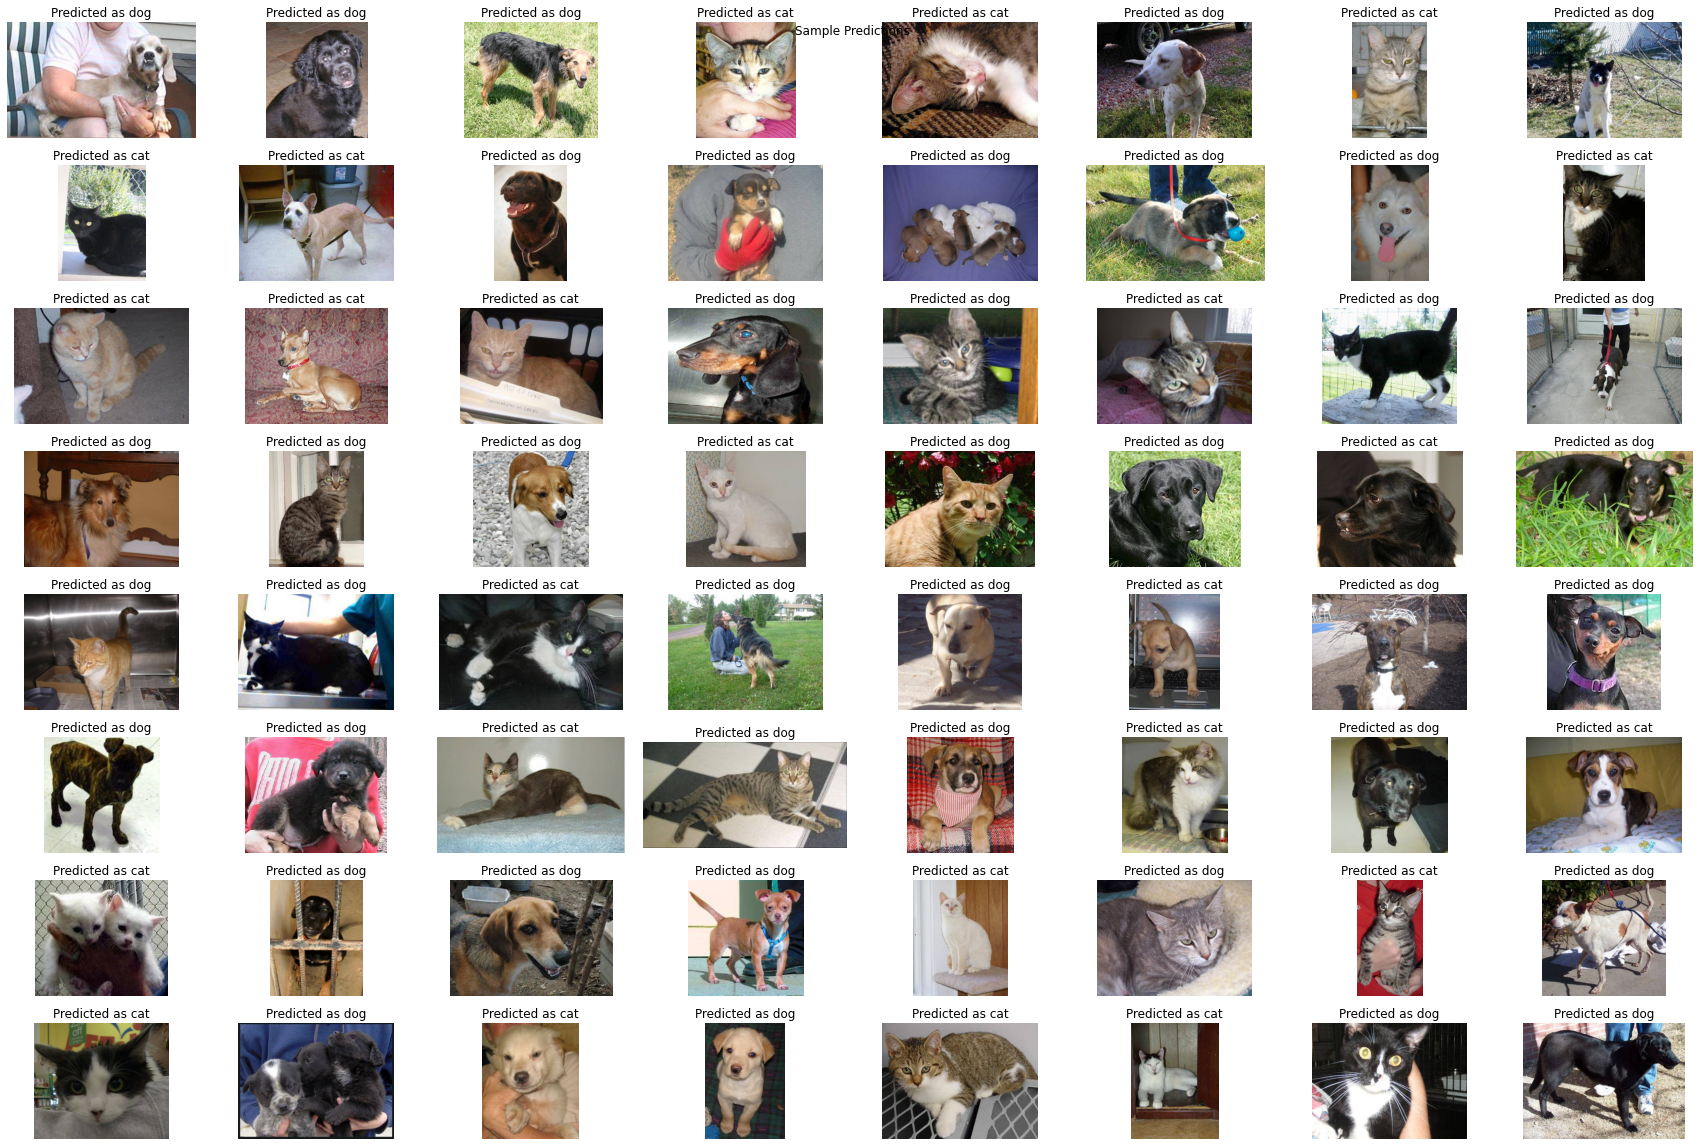

In [50]:
sample_test = test.sample(64).reset_index(drop = True)

fig = plt.figure(1, figsize = (24, 20))
fig.suptitle("Sample Predictions")

for i in range(len(sample_test)):
    
    plt.subplot(10, 8, i + 1)
    image = load_img(sample_test.filepath[i])
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Predicted as {sample_test['test_preds'][i]}")
    
plt.tight_layout()
plt.show()

## **Very bad Model**
## **Lets try Regularization techniques**

## **Model1: Use dropout after conv & Fully connected layers without Batch normalization**
## [Article on Regularization](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-batch-normalization/)
## [Cat vs Dog Kaggle](https://www.kaggle.com/meetnagadia/cats-vs-dogs-classification)
## [Drop and Batch Normalization Kaggle](https://www.kaggle.com/ryanholbrook/dropout-and-batch-normalization)
## [Covid Project Kaggle](https://dme2wmiz2suov.cloudfront.net/User(4778996)/Course(24649)/Section(131952)/Exercise(32411)/Assignment/1493915-Lungs_Chest_x_rays.pdf?Expires=1674445138&Signature=guLx0lpK9~aF~KP-82Lg~XxO8dqumMMztrNdkXLey-ZWfjNraJZLkzNVNDSwulDaXcKK05AgRTgSRSnZT~LmkQATI1Z43JpLaXQEoUqY6wJr2jnP7U7fPT4LRS-BWIXn8QOiNI-f8YhTPTmuvvRT1YdHVGOoLG05Ygk54rp81DNlz4zIejrBVL0dcatFimIFNOIXFRsMIBhooynmaHasn1NHEORs~E8EMoxPoX7kVqit18rHVqh1QIMPmIeIGgecL6eMQKIjIFy-YW9JEcPFILFxfX~z8BpJBkoi6y5TSfORofIo0yu1E1Z0Q1FGxAE~AB6l0M~DCIFhqI9Eh2BK8w__&Key-Pair-Id=APKAIIFZDCEANAVU2VTA)